<a href="https://colab.research.google.com/github/Nishiel/Projeto-SI-2023/blob/main/Trabalho_Facul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas:

##NumPy

NumPy é usada principalmente para realizar cálculos em Arrays Multidimensionais. O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos (MEDIUM, 2018).

##Matplotlib

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python (MEDIUM, 2020).

##Pandas

A biblioteca Pandas é utilizada para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis pelo usuário. Eles podem aumentar muito a produtividade, pois permitem que você personalize o ambiente do Pandas exatamente de acordo com suas preferências (VOITTO, 2021)

##Seaborn

Essa biblioteca é uma das mais populares para visualização de dados e oferece diversas ferramentas para criar gráficos elegantes e informativos. Seaborn é uma biblioteca de visualização de dados em Python baseada em Matplotlib

### Analise a Mortalidade brasileira

As taxas de mortalidade no Brasil são um importante indicador para a compreensão da saúde e bem-estar da população do país. É uma medida do número de mortes em um determinado período de tempo, que pode analisar as principais causas de morte, identificar tendências e desigualdades e orientar o desenvolvimento de políticas públicas para melhorar a qualidade de vida dos cidadãos.

##Importação das Bibliotecas.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

##Importação dos arquivos de dados.

In [4]:
mortalHomem1019 = pd.read_csv("mortalHomem1019.csv")

mortalMulher1019 = pd.read_csv("mortalMulher1019.csv")

mortalHomem1019.name = 'mortalHomem1019'

mortalMulher1019.name = 'mortalMulher1019'

##Legenda:

H1019 - Homens de 10 a 19 anos

M1019 - Mulheres de 10 a 19 anos

### Listando as 5 colunas em cada um dos dataframes, que contém as maiores causas de mortalidade em cada um dos grupos identifica e o ano correspondente

In [5]:
print('HOMENS 10-19    \n \n',mortalHomem1019.columns.tolist(),'\n ')
print('MULHERES 10-19   \n  \n',mortalMulher1019.columns.tolist(),'\n ')

HOMENS 10-19    
 
 ['Ano', 'Causas Externas', 'Aparelho Circulatorio', 'Neoplasias', 'Sistema Nervoso', 'Sintomas e sinais'] 
 
MULHERES 10-19   
  
 ['Ano', 'Causas Externas', 'Aparelho Respiratório', 'Neoplasias', 'Sistema Nervoso', 'Sintomas e sinais'] 
 


In [6]:
ch10=mortalHomem1019.columns.tolist()
cm10=mortalMulher1019.columns.tolist()


listacolunas=[ch10,cm10]
listacolunassem=[]
for a in listacolunas:
    a=[x for x in a if x != 'Ano']
    listacolunassem.append(a)

TodasCausas = set().union(*listacolunassem)
TodasCausas= list(TodasCausas)
print("Lista de Todas as maiores causas identificadas no período: \n\n", TodasCausas, "\n")
print("Número Total de categorias identificadas: \n\n",len(TodasCausas), "\n")

listacolunasH=[ch10]
listacolunasM=[cm10]

listacolunassemH=[]
for a in listacolunasH:
    a=[x for x in a if x != 'Ano']
    listacolunassemH.append(a)

TodasCausasH = set().union(*listacolunassemH)
TodasCausasH= list(TodasCausasH)
print('\n Todos grupos de causas dos homens \n\n ',TodasCausasH, "\n")
print(len(TodasCausas))

listacolunassemM=[]
for a in listacolunasM:
    a=[x for x in a if x != 'Ano']
    listacolunassemM.append(a)

TodasCausasM = set().union(*listacolunassemM)
TodasCausasM = list(TodasCausasM)
print('\n Todos grupos de causas das mulheres \n\n ',TodasCausasM)
print(len(TodasCausasM))

Lista de Todas as maiores causas identificadas no período: 

 ['Causas Externas', 'Sistema Nervoso', 'Aparelho Respiratório', 'Aparelho Circulatorio', 'Neoplasias', 'Sintomas e sinais'] 

Número Total de categorias identificadas: 

 6 


 Todos grupos de causas dos homens 

  ['Causas Externas', 'Sistema Nervoso', 'Aparelho Circulatorio', 'Neoplasias', 'Sintomas e sinais'] 

6

 Todos grupos de causas das mulheres 

  ['Causas Externas', 'Sistema Nervoso', 'Aparelho Respiratório', 'Neoplasias', 'Sintomas e sinais']
5


In [7]:
from scipy.stats import pearsonr

## Cálculo de correlações entre os grupos de causas para Homens de 10-19

In [8]:
ch10=mortalHomem1019.columns.drop('Ano')
for p in ch10:
    colunai=ch10.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalHomem1019[p], mortalHomem1019[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Causas Externas tem correlacao 0.40171791454201655 com Aparelho Circulatorio
Causas Externas tem correlacao 0.20628727978646577 com Neoplasias
Causas Externas tem correlacao 0.5305802083152921 com Sistema Nervoso
Causas Externas tem correlacao -0.18546921035666775 com Sintomas e sinais
Aparelho Circulatorio tem correlacao 0.40171791454201655 com Causas Externas
Aparelho Circulatorio tem correlacao -0.0458155514416973 com Neoplasias
Aparelho Circulatorio tem correlacao 0.278389813365321 com Sistema Nervoso
Aparelho Circulatorio tem correlacao -0.2460048879308117 com Sintomas e sinais
Neoplasias tem correlacao 0.20628727978646577 com Causas Externas
Neoplasias tem correlacao -0.0458155514416973 com Aparelho Circulatorio
Neoplasias tem correlacao 0.5450626939716001 com Sistema Nervoso
Neoplasias tem correlacao -0.4247508518042138 com Sintomas e sinais
Sistema Nervoso tem correlacao 0.5305802083152921 com Causas Externas
Sistema Nervoso tem correlacao 0.278389813365321 com Aparelho Circula

## Cálculo de correlações entre os grupos de causas para Mulheres de 10-19

In [9]:
cm10=mortalMulher1019.columns.drop('Ano')
for p in cm10:
    colunai=cm10.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalMulher1019[p], mortalMulher1019[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Causas Externas tem correlacao 0.6112390102331993 com Aparelho Respiratório
Causas Externas tem correlacao -0.2901193058447823 com Neoplasias
Causas Externas tem correlacao -0.5326504677561208 com Sistema Nervoso
Causas Externas tem correlacao 0.7476599495939129 com Sintomas e sinais
Aparelho Respiratório tem correlacao 0.6112390102331993 com Causas Externas
Aparelho Respiratório tem correlacao -0.1086561336373989 com Neoplasias
Aparelho Respiratório tem correlacao -0.6162785655029758 com Sistema Nervoso
Aparelho Respiratório tem correlacao 0.7399723128303449 com Sintomas e sinais
Neoplasias tem correlacao -0.2901193058447823 com Causas Externas
Neoplasias tem correlacao -0.1086561336373989 com Aparelho Respiratório
Neoplasias tem correlacao 0.03005903764498604 com Sistema Nervoso
Neoplasias tem correlacao -0.43493295052846515 com Sintomas e sinais
Sistema Nervoso tem correlacao -0.5326504677561208 com Causas Externas
Sistema Nervoso tem correlacao -0.6162785655029758 com Aparelho Resp

##Visualização de Óbitos Aparelho respiratório dos Homens de 10 a 19

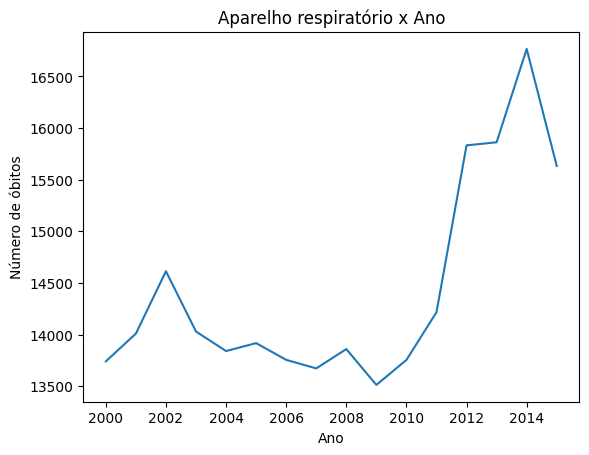

In [10]:
plt.plot(mortalHomem1019['Ano'],mortalHomem1019[cm10.tolist()[0]])
plt.title('Aparelho respiratório x Ano')
plt.xlabel('Ano')
plt.ylabel('Número de óbitos')

plt.show()

##Visualização de Óbitos Aparelho respiratório das Mulheres de 10 a 19

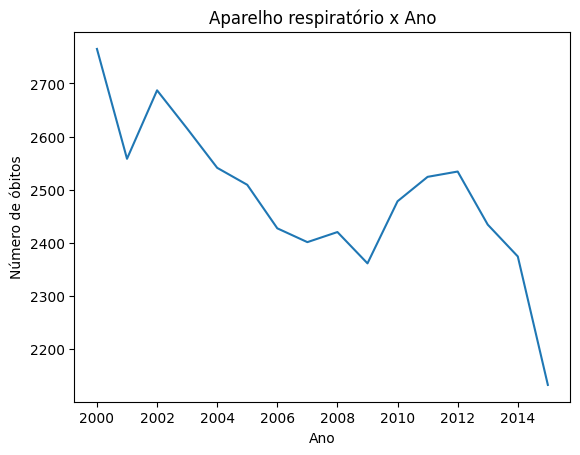

In [11]:
plt.plot(mortalMulher1019['Ano'],mortalMulher1019[ch10.tolist()[0]])
plt.title('Aparelho respiratório x Ano')
plt.xlabel('Ano')
plt.ylabel('Número de óbitos')

plt.show()

## Inserindo dados de população para obter as taxas relativas de mortalidade

In [12]:
Pop = pd.read_csv("PopulacaoBrasil.csv")

In [13]:
Pop=Pop[Pop['Ano']>1999]
Pop=Pop[Pop['Ano']<2016]

In [14]:
anos=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
populacao=Pop['População']

In [15]:
population=populacao.tolist()
pop=[]
for i in population:
    a=i.replace(" ", "")
    #print(a)
    a=int(a)
    pop.append(a)

PoP=pd.Series(pop)

POPULACAO=np.array(PoP)
POPULACAO=POPULACAO.astype(float)

In [16]:
ch1019=mortalHomem1019.columns
ch1019=ch1019.drop('Ano')

cm1019=mortalMulher1019.columns
cm1019=cm1019.drop('Ano')

listadfs=[mortalHomem1019,mortalMulher1019]
dictcolunas={'mortalHomem1019':ch1019,'mortalMulher1019':cm1019}

In [17]:
taxamortH1019 = pd.DataFrame()
taxamortM1019 = pd.DataFrame()

taxamortH1019.name = 'mortalHomem1019'
taxamortM1019.name = 'mortalMulher1019'

taxas=[taxamortH1019,taxamortM1019]

dictdata ={'mortalHomem1019': taxamortH1019,'mortalMulher1019': taxamortM1019}


In [18]:
for a in listadfs:
    for i in dictcolunas[a.name]:

        dictdata[a.name][str(i)]=a[str(i)]*1000000/POPULACAO

In [19]:
for a in taxas:
    a['Ano']=anos

In [20]:
anos

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

## Gráficos dois a dois de grupos de causas para taxa de mortalidade e ano

Gráfico linear sobra a taxa de mortalidade Homens.

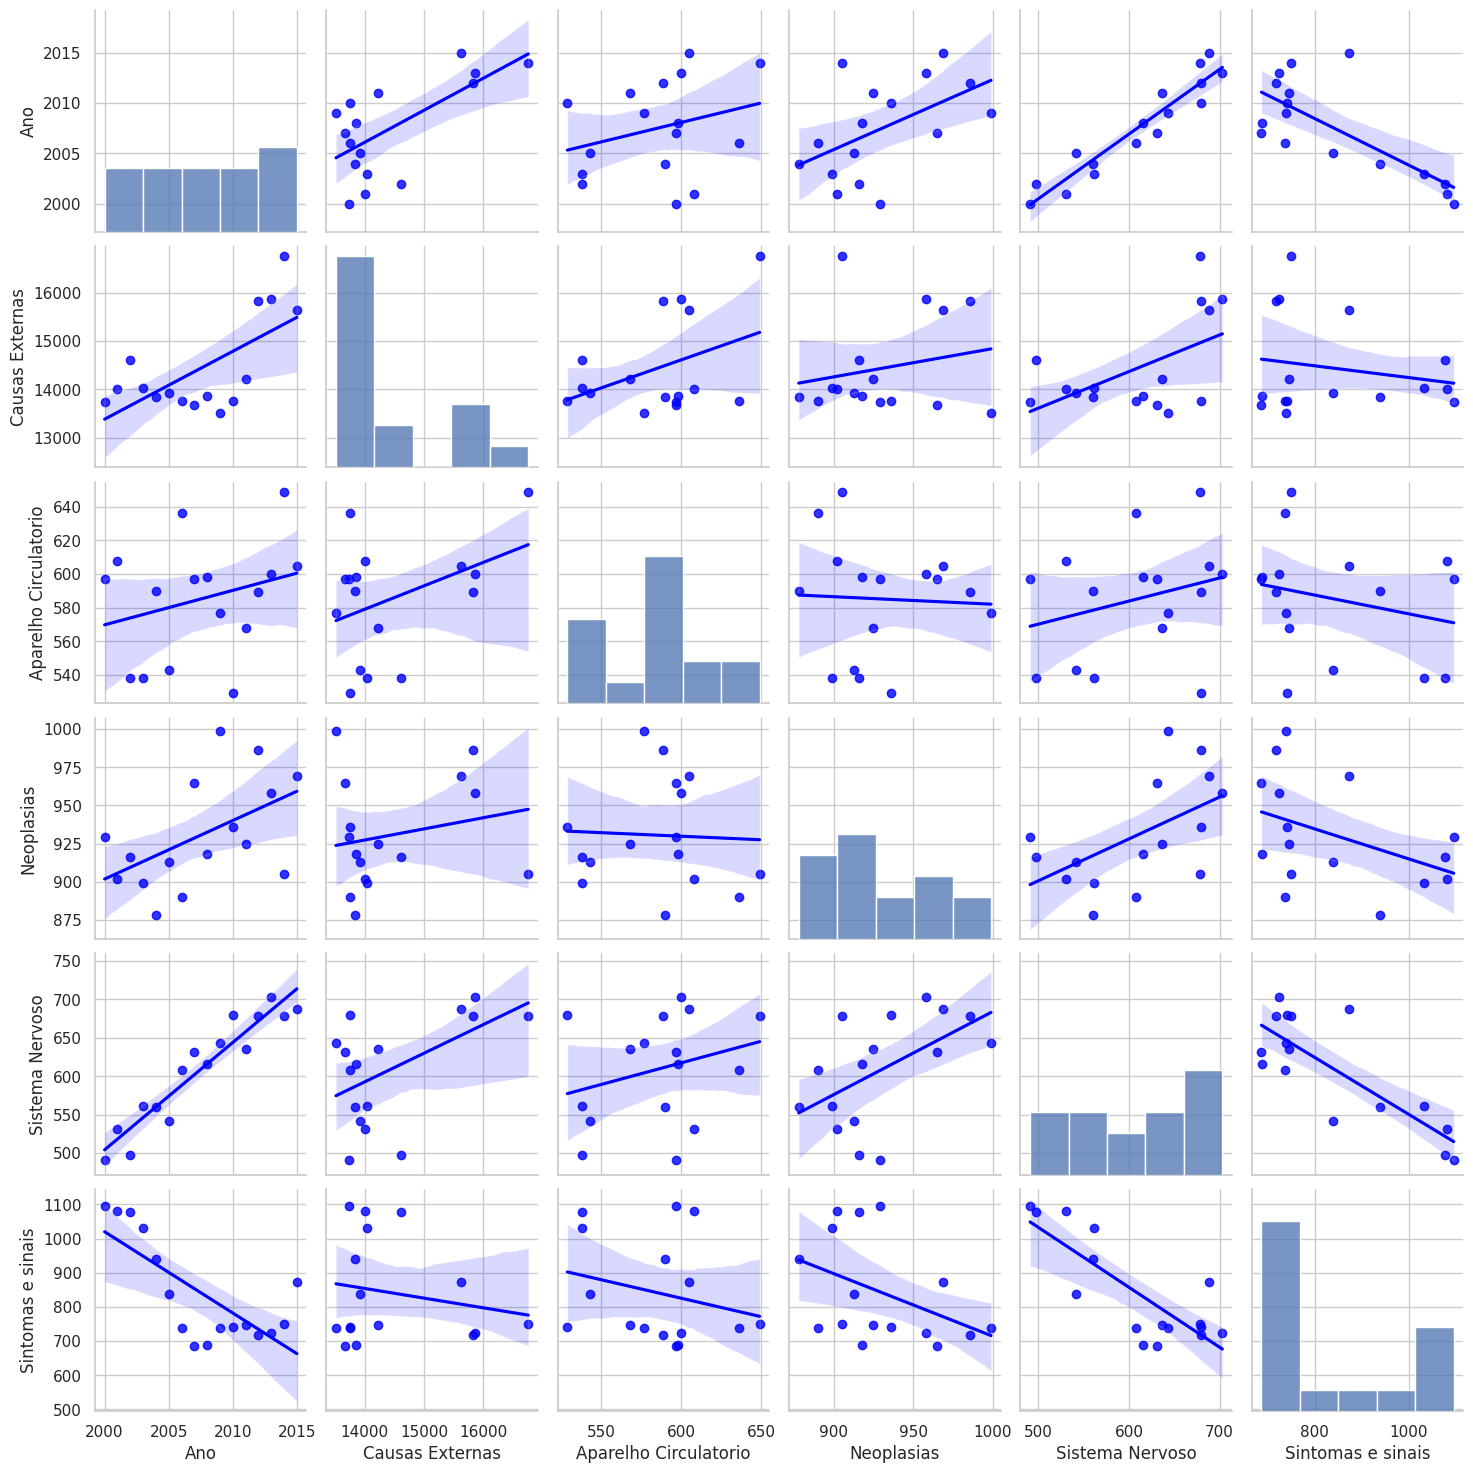

In [21]:
sns.set(style="whitegrid")
df = mortalHomem1019
sns.pairplot(df, kind='reg', plot_kws={"color": "blue"})

Gráfico linear sobra a taxa de mortalidade Mulheres.

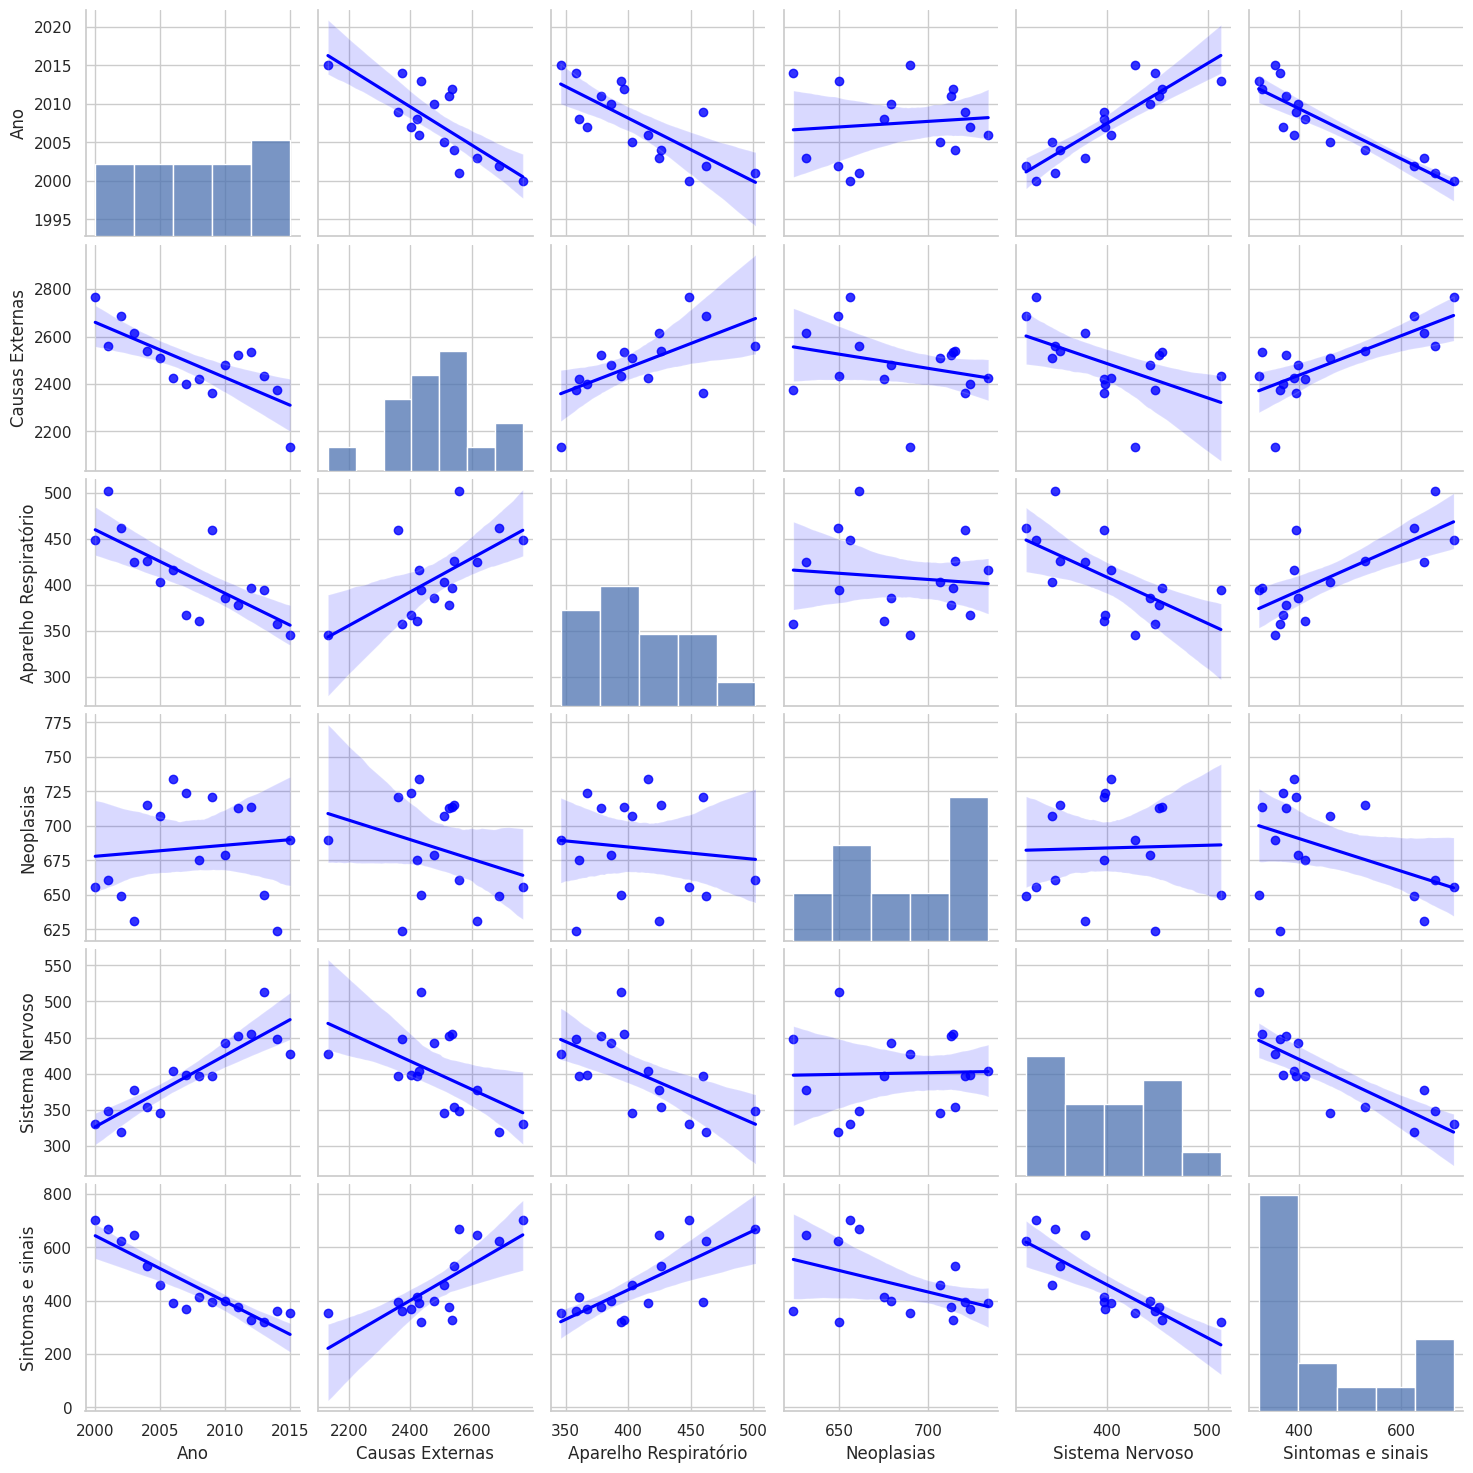

In [22]:
sns.set(style="whitegrid")
df = mortalMulher1019
sns.pairplot(df, kind='reg', plot_kws={"color": "blue"})

## Aplicação de regressões lineares sobre as taxas de mortalidade e os anos dois a dois

In [23]:
pctvariataxamortH1019 = pd.DataFrame()
pctvariataxamortM1019 = pd.DataFrame()

pctvariataxamortH1019.name = 'pctvariataxamortH1019'
pctvariataxamortM1019.name = 'pctvariataxamortM1019'


dictdatapct ={'mortalHomem1019': pctvariataxamortH1019,'mortalMulher1019': pctvariataxamortM1019}

In [24]:
pcttaxas=[pctvariataxamortH1019,pctvariataxamortM1019]

In [25]:
for a in taxas:
    for i in dictcolunas[a.name]:
        #print(dictdata[a.name][i])

        dictdatapct[a.name][str(i)]=a[str(i)].pct_change()

In [26]:
for a in pcttaxas:
    a.dropna()

In [27]:
pctvariataxamortH1019 =  pctvariataxamortH1019.dropna()

pctvariataxamortM1019 = pctvariataxamortM1019.dropna()

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [29]:
arvoredecide=DecisionTreeRegressor()

In [30]:
for a in taxas:
    a['idade']= a.name
    a['genero']= a.name

In [31]:
taxamortH1019['genero'] = ['Homens'] * 16
taxamortH1019['idade'] = ['Entre 10 e 19'] * 16
taxamortM1019['genero'] = ['Mulheres'] * 16
taxamortM1019['idade'] = ['Entre 10 e 19'] * 16

In [32]:
taxamortH1019
taxamortH1019.index=range(34,50)

taxamortM1019.index=range(85,101)

In [33]:
todastaxas = pd.concat(taxas)

In [34]:
todastaxas

,Causas Externas,Aparelho Circulatorio,Neoplasias,Sistema Nervoso,Sintomas e sinais,Ano,idade,genero,Aparelho Respiratório
34,78.752905,3.421797,5.324705,2.814241,6.276159,2000,Entre 10 e 19,Homens,NaN
35,79.100898,3.433032,5.093084,2.998257,6.103795,2001,Entre 10 e 19,Homens,NaN
36,81.304163,2.993337,5.096463,2.765221,5.992239,2002,Entre 10 e 19,Homens,NaN
37,76.940177,2.950589,4.930445,3.076730,5.659866,2003,Entre 10 e 19,Homens,NaN
38,74.862668,3.191400,4.749236,3.029125,5.079194,2004,Entre 10 e 19,Homens,NaN
39,74.304129,2.899126,4.874590,2.893787,4.479497,2005,Entre 10 e 19,Homens,NaN
40,72.551777,3.354630,4.694372,3.206941,3.887362,2006,Entre 10 e 19,Homens,NaN
41,71.304378,3.113569,5.032821,3.290891,3.582951,2007,Entre 10 e 19,Homens,NaN
42,71.520316,3.086020,4.737402,3.178910,3.550471,2008,Entre 10 e 19,Homens,NaN
43,69.031934,2.947856,5.103826,3.285045,3.775503,2009,Entre 10 e 19,Homens,NaN


### Acidentes de transito no territorio brasileiro de 2011 a 2021.

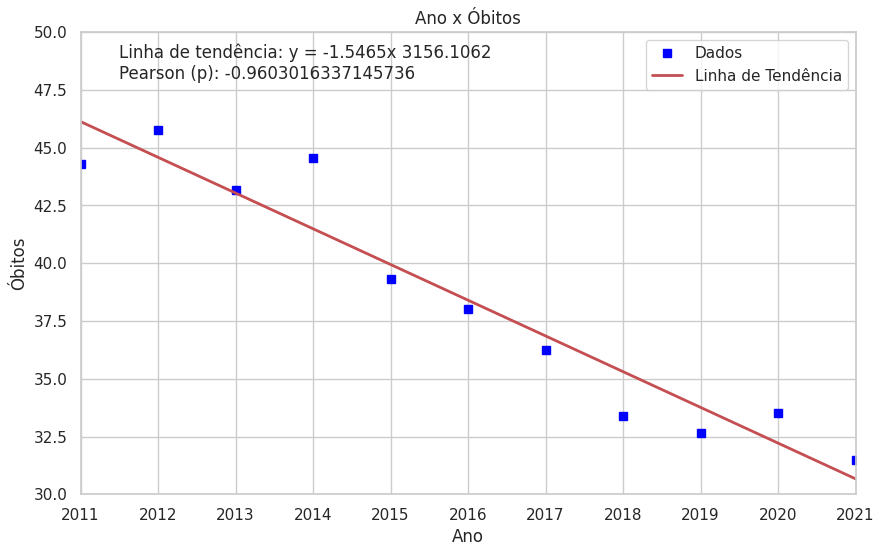

In [35]:
# Definição de x e y
ano = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
obitos = np.array([44.299, 45.769, 43.159, 44.56, 39.324, 38.002, 36.234, 33.408, 32.667, 33.497, 31.468])

equacao = np.polyfit(ano, obitos, 1)
correlacao = np.corrcoef(ano, obitos)[0][1]
linha_tendencia = np.poly1d(equacao)

texto = f'Linha de tendência: y = {equacao[0]:.4f}x {equacao[1]:.4f}\nPearson (p): {correlacao}'

plt.figure(figsize=(10, 6))
plt.title("Ano x Óbitos")
plt.xlabel("Ano")
plt.ylabel("Óbitos")

plt.grid(True)

plt.text(0.05, 0.9, texto, transform=plt.gca().transAxes)
plt.plot(ano, obitos,'s', label='Dados', color='blue')
plt.plot(ano, linha_tendencia(ano), 'r-', linewidth=2, label='Linha de Tendência')

plt.legend()
plt.xlim(2011, 2021)
plt.ylim(30, 50)

plt.xticks(ano, rotation='horizontal')

plt.show()

Em 2020, as mortes no trânsito no Brasil voltaram a subir pela primeira vez após oito anos de queda. Segundo os dados, 33.497 pessoas morreram em acidentes de trânsito no Brasil. Esse número foi cerca de 2,5% maior que o recorde de 2019. Também é superior ao número de mortos em 2018, quando o Brasil registrou 33.408 mortes no trânsito.

Vale lembrar que 2020 é o primeiro ano da pandemia causada pela Covid-19 no Brasil, e neste ano, foram muitas as restrições nas grandes cidades, que reduziram o número de veículos nas estradas brasileiras.

 Perfil das vítimas
Os perfis das vítimas de 2021 ainda não foram divulgados, mas segundo o Ministério da Saúde, os motociclistas foram as pessoas que mais mataram nas estradas e rodovias do Brasil em 2020. 12.011 pessoas morreram neste caso. Isso foi seguido por ocupantes de carros (6.987) e pedestres (5.120). A faixa etária mais vulnerável estava entre 20 e 59 anos, mostraram os dados.

### Mortalidade infantil por Ano (2000 a 2015).

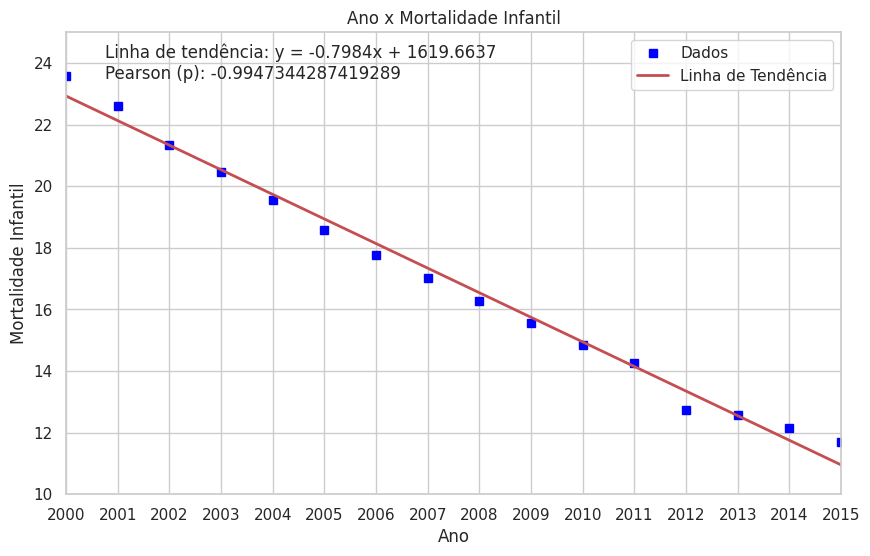

In [36]:
ano = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
mortalidade_infantil = np.array([23.59, 22.61, 21.34, 20.45, 19.55, 18.57, 17.78, 17.01, 16.29, 15.56, 14.86, 14.26, 12.74, 12.58, 12.15, 11.71])

equacao = np.polyfit(ano, mortalidade_infantil, 1)
correlacao = np.corrcoef(ano, mortalidade_infantil)[0][1]
linha_tendencia = np.poly1d(equacao)

texto = f'Linha de tendência: y = {equacao[0]:.4f}x + {equacao[1]:.4f}\nPearson (p): {correlacao}'

plt.figure(figsize=(10, 6))
plt.title("Ano x Mortalidade Infantil")
plt.xlabel("Ano")
plt.ylabel("Mortalidade Infantil")

plt.grid(True)

plt.text(0.05, 0.9, texto, transform=plt.gca().transAxes)
plt.plot(ano, mortalidade_infantil, 's', label='Dados', color='blue')
plt.plot(ano, linha_tendencia(ano), 'r-', linewidth=2, label='Linha de Tendência')

plt.legend()
plt.xlim(2000, 2015)
plt.ylim(10, 25)

plt.xticks(ano, rotation='horizontal')

plt.show()

Acima estão as mortalidades infantis de 2000 a 2015

*   Podemos verificar que há uma drastica diminuição por apartir do ano de 2011 para 2012 no nível de mortes

### Mortalidade infantil por Estado em 2015.

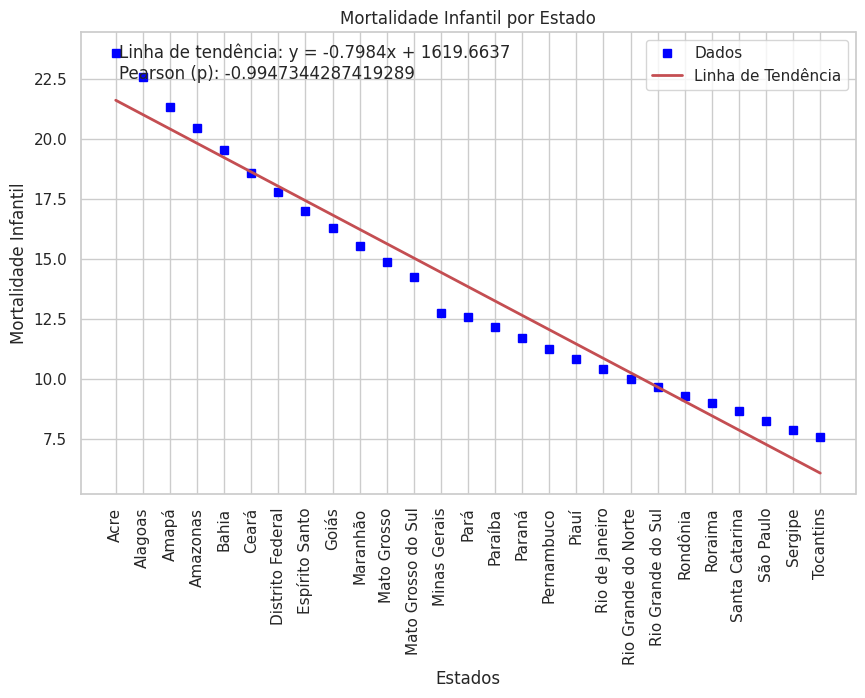

In [37]:
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']
mortalidade = np.array([23.59, 22.61, 21.34, 20.45, 19.55, 18.57, 17.78, 17.01, 16.29, 15.56, 14.86, 14.26, 12.74, 12.58, 12.15, 11.71, 11.23, 10.81, 10.39, 10.01, 9.64, 9.26, 9.00, 8.64, 8.25, 7.88, 7.58])

equacao = np.polyfit(np.arange(len(estados)), mortalidade, 1)
correlacao = np.corrcoef(np.arange(len(estados)), mortalidade)[0][1]
linha_tendencia = np.poly1d(equacao)

plt.figure(figsize=(10, 6))
plt.title("Mortalidade Infantil por Estado")
plt.xlabel("Estados")
plt.ylabel("Mortalidade Infantil")

plt.grid(True)

plt.text(0.05, 0.9, texto, transform=plt.gca().transAxes)
plt.plot(estados, mortalidade, 's', label='Dados', color='blue')
plt.plot(estados, linha_tendencia(np.arange(len(estados))), 'r-', linewidth=2, label='Linha de Tendência')

plt.legend()
plt.xticks(rotation='vertical')

plt.show()


Podemos ver que: No gráfico a cima a mortalidade infantil em 2015 em cidades como Tocantins e Sergipe São menores que em estados como alagoas e Acre

### Taxa de suicidio por estado - 2019

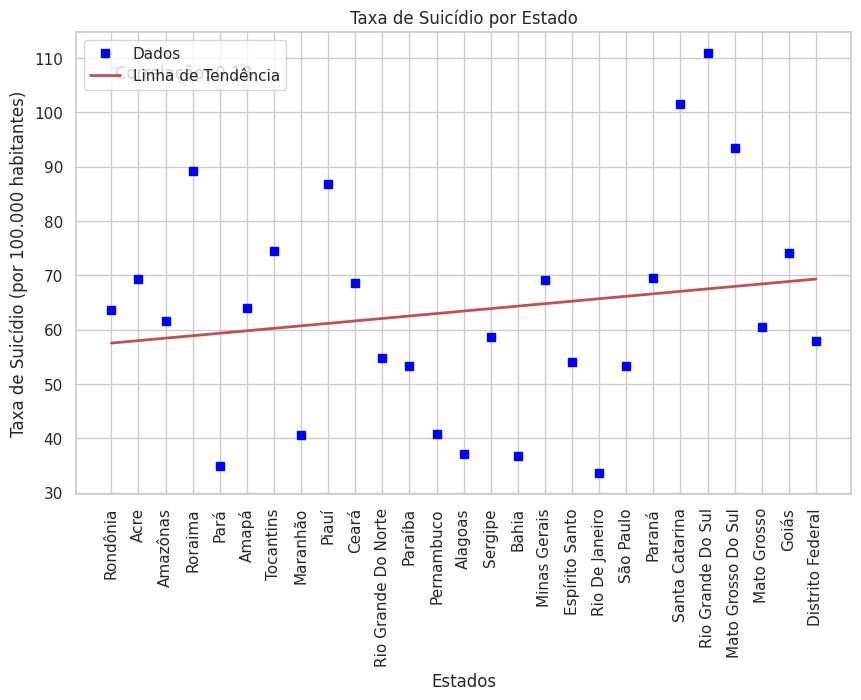

In [38]:
estados = ['Rondônia', 'Acre', 'Amazônas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande Do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio De Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande Do Sul', 'Mato Grosso Do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']

n = np.array([995, 508, 2145, 402, 2640, 429, 1030, 2676, 2710, 5805, 1733, 2009, 3583, 1159, 1213, 5142, 13541, 1899, 5373, 21970, 7252, 6349, 11860, 2290, 1835, 4453, 1490])
pop_ibge = np.array([1562409, 733559, 3483985, 450479, 7581051, 669526, 1383445, 6574789, 3118360, 8452381, 3168027, 3766528, 8796448, 3120494, 2068017, 14016906, 19597330, 3514952, 15989929, 41262199, 10444526, 6248436, 10693929, 2449024, 3035122, 6003788, 2570160])

taxa_suicidio = n / (pop_ibge / 100000)

equacao = np.polyfit(np.arange(len(estados)), taxa_suicidio, 1)
correlacao = np.corrcoef(np.arange(len(estados)), taxa_suicidio)[0][1]
linha_tendencia = np.poly1d(equacao)

plt.figure(figsize=(10, 6))
plt.title("Taxa de Suicídio por Estado")
plt.xlabel("Estados")
plt.ylabel("Taxa de Suicídio (por 100.000 habitantes)")

plt.grid(True)

plt.plot(estados, taxa_suicidio, 's', label='Dados', color='blue')
plt.plot(estados, linha_tendencia(np.arange(len(estados))), 'r-', linewidth=2, label='Linha de Tendência')

texto = f"Correlação: {correlacao:.2f}"
plt.text(0.05, 0.9, texto, transform=plt.gca().transAxes)

plt.legend()
plt.xticks(rotation='vertical')

plt.show()


Aqui concluimos que com os dados adquiridos atráves das pesquisas feitas com base nos dados apresentados a quantidade de mortes por suícidio são maiores em cidades mais populosas no ano de 2019

# Conclusão

### Em geral temos em vista que os dados apresentados neste trabalho, demonstram a evolução e a grande diminuição da taxa de mortalidade no brasil, e com os dados aqui colocados temos a noção que essa taxa tem como ser diminuida ainda mais com o tempo.

## Referências:
Portal do transito e mobilidade. (11/2022)
https://www.portaldotransito.com.br/noticias/fiscalizacao-e-legislacao/estatisticas/dados-preliminares-de-2021-mostram-tendencia-de-queda-no-numero-de-mortes-no-transito-brasileiro/

Banco de dados Sobre suicidio KAGGLE. (2010 e 2019)
https://www.kaggle.com/datasets/psicodata/dados-de-suicidios-entre-2010-e-2019

Dados retirados do Banco de dados DATASUS. (2012)
https://datasus.saude.gov.br

importação de dados obtidos sobre a mortalidade de homens e mulheres em dados.gov (2000 a 2015) https://dados.gov.br/home